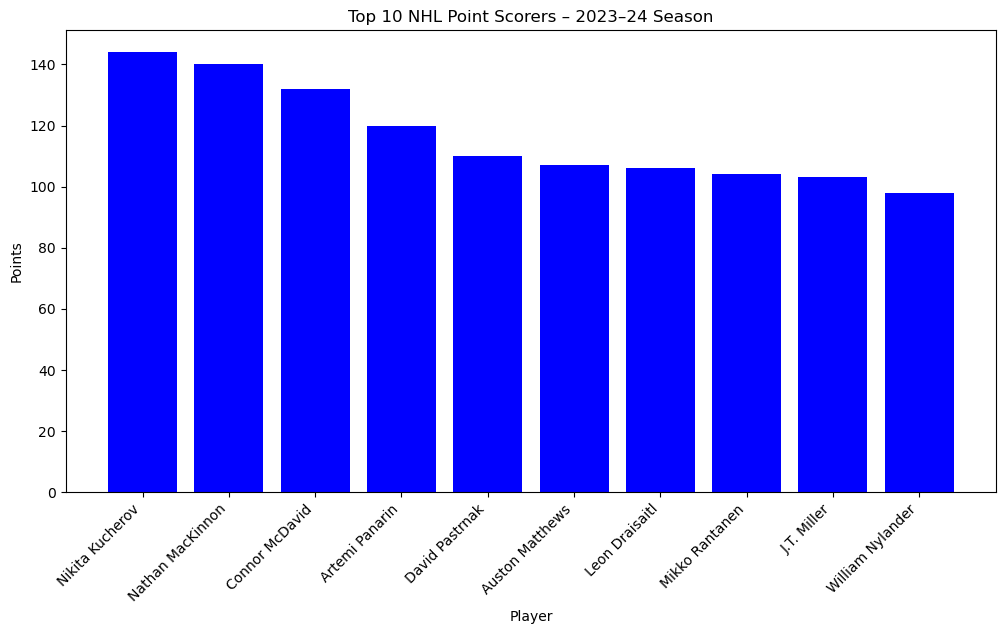

In [9]:
import matplotlib.pyplot as plt

players = [
    "Nikita Kucherov",
    "Nathan MacKinnon",
    "Connor McDavid",
    "Artemi Panarin",
    "David Pastrnak",
    "Auston Matthews",
    "Leon Draisaitl",
    "Mikko Rantanen",
    "J.T. Miller",
    "William Nylander"
]

points = [144, 140, 132, 120, 110, 107, 106, 104, 103, 98]


plt.figure(figsize=(12, 6))
bars = plt.bar(players, points, color='blue')
plt.title("Top 10 NHL Point Scorers – 2023–24 Season")
plt.xlabel("Player")
plt.ylabel("Points")
plt.xticks(rotation=45, ha='right')


plt.show()


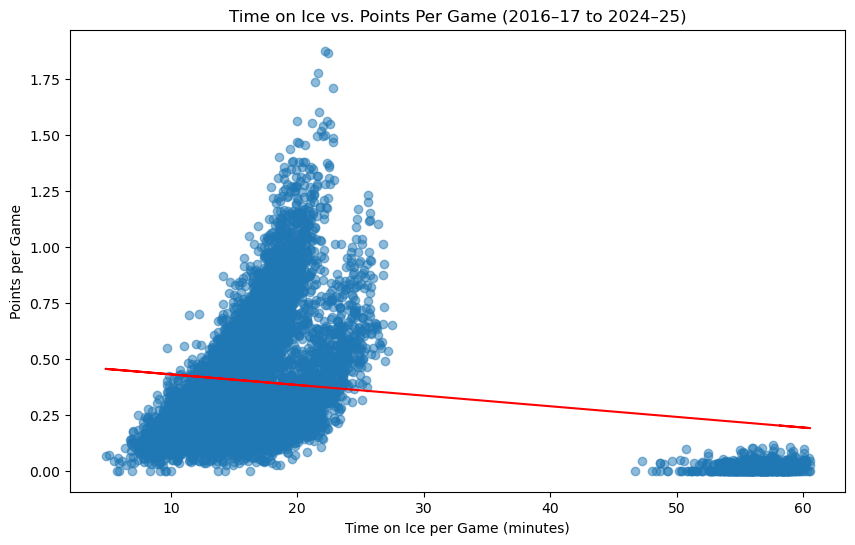

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

seasons = list(range(2017, 2026))
dfs = []

def load_season(season):
    url = f"https://www.hockey-reference.com/leagues/NHL_{season}_skaters.html"
    df = pd.read_html(url, header=1)[0]
    df = df[df['Player'] != 'Player']  # Remove duplicate headers
    df = df.dropna(subset=['GP', 'G', 'A', 'PTS', 'TOI'])
    return df

def convert_toi(toi):
    if isinstance(toi, str) and ':' in toi:
        mins, secs = map(int, toi.split(':'))
        return mins + secs/60
    return np.nan

for season in seasons:
    try:
        df_season = load_season(season)
        df_season['Season'] = season
        dfs.append(df_season)
    except Exception as e:
        print(f"Failed to load {season}: {e}")


data = pd.concat(dfs, ignore_index=True)


data['TOI_min'] = data['TOI'].apply(convert_toi)

data['TOI/GP'] = data['TOI_min'] / data['GP']

data['P/GP'] = data['PTS'] / data['GP']

data = data[data['GP'] >= 20]

data = data.dropna(subset=['TOI/GP', 'P/GP'])

X = data[['TOI/GP']]
X = sm.add_constant(X)  # Adds intercept
y = data['P/GP']

model = sm.OLS(y, X).fit()

plt.figure(figsize=(10,6))
plt.scatter(data['TOI/GP'], data['P/GP'], alpha=0.5)
plt.plot(data['TOI/GP'], model.predict(X), color='red')
plt.xlabel('Time on Ice per Game (minutes)')
plt.ylabel('Points per Game')
plt.title('Time on Ice vs. Points Per Game (2016–17 to 2024–25)')
plt.show()